In [ ]:
**단계 1:** 파이썬 패키지 import

In [1]:
# K-means clustering 예시 입니다.
# 본 예제에서는 붓꽃 (iris)를 사용하여 수행합니다.
# 붓꽃 데이터에서는 꽃 받침 (Sepal)의 길이와 폭, 꽃잎 (Petal)의 길이와 폭 데이터가 포함됩니다.
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels], axis=1)


# 붓꽃 데이터의 일부분을 출력합니다.
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**단계 2:** 학습에 사용할 데이터 확인

In [2]:
# K-means에 사용할 데이터를 설정합니다.
# 꽃 받침의 폭과 길이를 사용합니다.
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


**단계 3:** 클러스터의 갯수 설정

In [3]:
# 클러스터의 갯수와 방법을 설정합니다.
# 본 예제에서는 클러스터의 갯수는 3개, 방법은 기본적인 방법을 사용합니다.
# model.fit()을 사용, 데이터를 학습된 모델에 맞춰서 군집화를 진행합니다.
# 최종적으로 어떤 클러스터로 군집화가 되었는지 확인합니다.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 모델을 생성하고 예측합니다.
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

#print(predict)

**단계 4:** 산점도 그리기

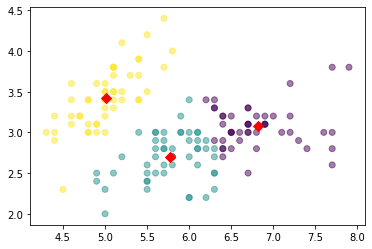

In [6]:
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)


centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()



**단계 5:** 가장 적합한 클러스터의 갯수 확인

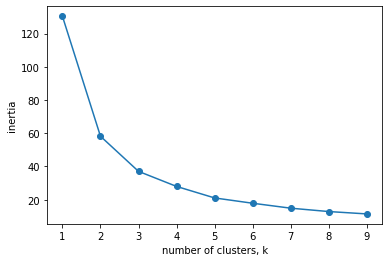

In [21]:
# 가장 적합한 클러스터의 갯수를 찾습니다.
# 이때 적합성을 판정하기 위해 intertia를 사용합니다.

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()